In [1]:

NUM_PROC_MAP = 150 # expect 30 min with single process
PUSH_TO_HF = False

DEBUG = True
EPOCHS = 10
HF_USERNAME = None

import os

from dotenv import load_dotenv
load_dotenv()
import datasets
from datasets import DatasetDict
from datasets import load_dataset
import datasets
import torch
import json
from huggingface_hub import HfApi

import numpy as np

from scipy.stats import norm
from scipy.stats import f
from scipy.stats import lognorm
import plotting
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import torch
import datasets
from datasets import load_dataset




DEBUG = True


In [2]:
from util import get_curriculum
from baseline_curricula import count_tokens_seen, count_tokens_dataset

In [3]:

from itertools import product
import config 

In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("loris3/babylm_2024_10m_curriculum_llama_mattr_increasing", max_len=512)


In [ ]:
for dataset_name in config.datasets[1:]:
    dataset = load_dataset(dataset_name)
    
    t = tokenizer(dataset["train"]["text"])
    aa = [i for i,doc in enumerate(t["input_ids"]) if len(doc) == 0]
    # print(dataset_name, dataset["train"].select([i for i,doc in enumerate(t["input_ids"]) if len(doc) == 0])["text"])
    
    curriculum = get_curriculum(dataset_name,"llama_influence_incr_bins_dirac.pt")
    for epoch in range(0,len(curriculum)):
        print("epoch",epoch)
        examples_since_tokens = 0
        for i in curriculum[epoch]:
            if i in aa:
                print(examples_since_tokens)
                examples_since_tokens = 0
            else:
                examples_since_tokens+=1
        print(examples_since_tokens)

0
100000
1
100000
2
100000
3
100000
4
100000
5
100000
6
100000
7
100000
8
100000
9
100000
0


KeyboardInterrupt: 

In [ ]:
examples_since_tokens = 0
for i in get_curriculum(dataset_name,"llama_influence_incr_bins_dirac.pt")[3]:
    if i not in aa:
        print(examples_since_tokens)
        examples_since_tokens = 0
    else:
        examples_since_tokens+=1

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [41]:
tokens_per_doc.index(False)

360629

In [22]:
sum([len(tokens) > 0 for tokens in t.values()])

2

In [8]:
[x.dtype for x in get_curriculum("loris3/stratified_10m_curriculum","llama_influence_incr_bins_dirac.pt")]

[torch.int64,
 torch.int64,
 torch.int64,
 torch.int64,
 torch.int64,
 torch.int64,
 torch.int64,
 torch.int64,
 torch.int64,
 torch.int64]

In [4]:
import torch
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from baseline_curricula import validate_training_duration_limitation
from itertools import product, chain
import config 
from util import get_curriculum

experiments = list(product(config.datasets, config.baseline_curricula + list(chain.from_iterable([[model_type + c for c in config.influence_curricula] for model_type in config.model_types]))))


In [ ]:
11790140/22

In [ ]:
data = []
for dataset_name, curriculum_name in experiments:
    
    curriculum = get_curriculum(dataset_name, curriculum_name)
    dataset = load_dataset(dataset_name)["train"]
    info = {
            "dataset" : dataset_name, 
            "curriculum" : curriculum_name,
            "documents in dataset" : len(dataset),
            "documents seen by model" : sum((len(epoch) for epoch in curriculum)),
            "tokens in dataset" : count_tokens_dataset(dataset),
            #"tokens seen by model" : count_tokens_seen(dataset, curriculum)
            
        }
    data.append(info)
df = pd.DataFrame(data)


In [ ]:
df = df.set_index(["dataset","curriculum"])

In [ ]:
df

documents in dataset  \
dataset                                    curriculum                                   
loris3/babylm_2024_10m_curriculum          random.pt                          1179014   
                                           source_difficulty.pt               1179014   
loris3/stratified_equitoken_10m_curriculum random.pt                           100000   
                                           source_difficulty.pt                100000   
loris3/stratified_10m_curriculum           random.pt                          1070321   
                                           source_difficulty.pt               1070321   

                                                                 documents seen by model  \
dataset                                    curriculum                                      
loris3/babylm_2024_10m_curriculum          random.pt                            11790140   
                                           source_difficulty.pt                 11026808   
loris3/stratified_equitoken_10m_curriculum random.pt                             1000000   
                                           source_difficulty.pt                  1000000   
loris3/stratified_10m_curriculum           random.pt                            10703210   
                                           source_difficulty.pt                 10703282   

                                                                 tokens in dataset  
dataset                                    curriculum                               
loris3/babylm_2024_10m_curriculum          random.pt                       9953773  
                                           source_difficulty.pt            9953773  
loris3/stratified_equitoken_10m_curriculum random.pt                      10000000  
                                           source_difficulty.pt           10000000  
loris3/stratified_10m_curriculum           random.pt                       9999925  
                                           source_difficulty.pt            9999925

<Axes: xlabel='dataset,curriculum'>

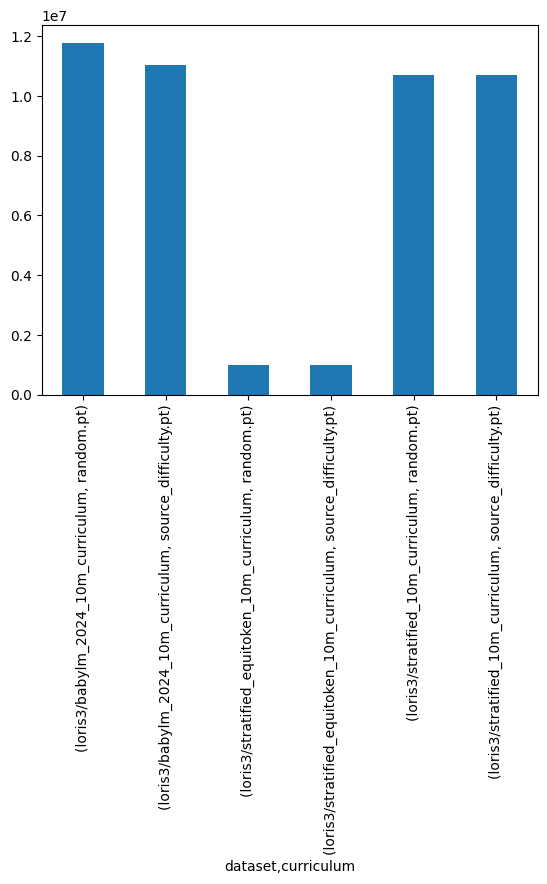

In [7]:
df["documents seen by model"].plot.bar()

In [8]:

data = []
for d in experiments:
    curriculum = get_curriculum(*d)
    print(d, curriculum)
    data.append((d, torch.cat(curriculum).flatten()))
    



tensors = [item[1] for item in data]
file_names = [item[0][1] for item in data] 


min_length = min(tensor.shape[0] for tensor in tensors)


truncated_tensors = [tensor[:min_length] for tensor in tensors]


corr_matrix = np.zeros((len(tensors), len(tensors)))

for i in range(len(tensors)):
    for j in range(len(tensors)):
        corr, _ = spearmanr(truncated_tensors[i].numpy(), truncated_tensors[j].numpy())
        corr_matrix[i, j] = corr



('loris3/babylm_2024_10m_curriculum', 'random.pt') [tensor([462446, 809355, 368322,  ...,  39603, 402942, 413224]), tensor([1043188,   83287,    4986,  ...,  888024,  315089,  485807]), tensor([ 990716, 1173500,  715941,  ...,  540916,  768955,  349777]), tensor([ 999954,  149294,  739773,  ..., 1141682, 1045478,  626108]), tensor([ 359215,  277636, 1035301,  ...,    1674,  291775,  612176]), tensor([411963, 601356, 471672,  ..., 944379, 929044, 494661]), tensor([ 519346, 1125567,  929543,  ...,  416022,   28865,  410770]), tensor([ 862891,  345975, 1090811,  ...,  834544,  307552,  322251]), tensor([1119829,   24267, 1148313,  ...,   53795,  715191,   90101]), tensor([  69351,  642529,  740593,  ..., 1007246,  693065,  674208])]
('loris3/babylm_2024_10m_curriculum', 'source_difficulty.pt') [tensor([  8933, 437545, 471759,  ...,  33991, 224857, 383641]), tensor([156889, 224053, 264396,  ..., 243565,  34977, 399672]), tensor([616349, 589845, 627263,  ..., 662138, 606808, 589816]), tenso

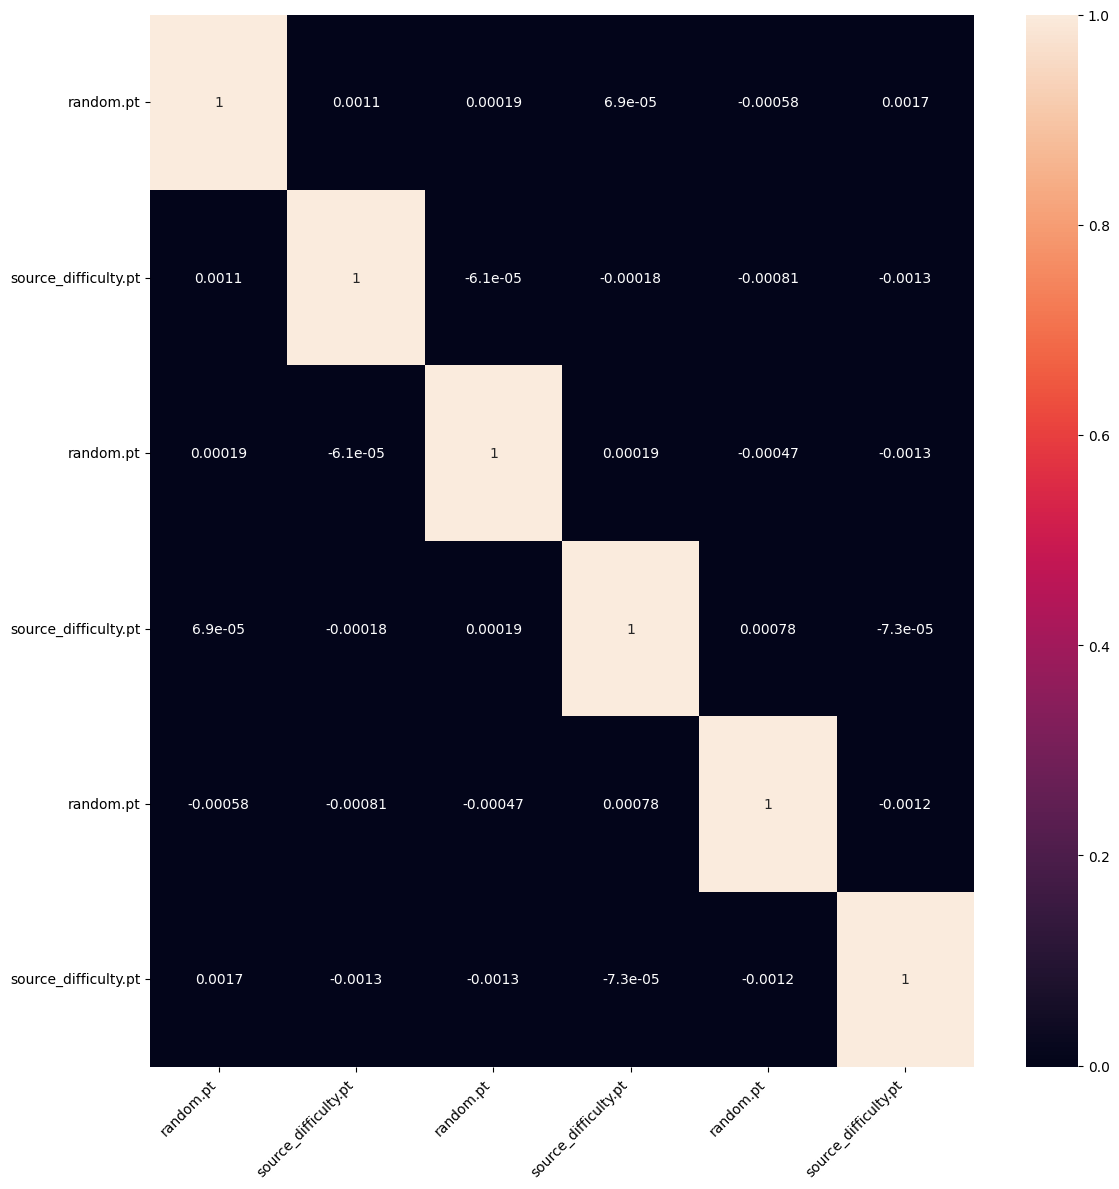

In [9]:

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, xticklabels=file_names, 
            yticklabels=file_names, cbar=True)

plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()


In [10]:
df

documents in dataset  \
dataset                                    curriculum                                   
loris3/babylm_2024_10m_curriculum          random.pt                          1179014   
                                           source_difficulty.pt               1179014   
loris3/stratified_equitoken_10m_curriculum random.pt                           100000   
                                           source_difficulty.pt                100000   
loris3/stratified_10m_curriculum           random.pt                          1070321   
                                           source_difficulty.pt               1070321   

                                                                 documents seen by model  \
dataset                                    curriculum                                      
loris3/babylm_2024_10m_curriculum          random.pt                            11790140   
                                           source_difficulty.pt                 11026808   
loris3/stratified_equitoken_10m_curriculum random.pt                             1000000   
                                           source_difficulty.pt                  1000000   
loris3/stratified_10m_curriculum           random.pt                            10703210   
                                           source_difficulty.pt                 10703282   

                                                                 tokens in dataset  
dataset                                    curriculum                               
loris3/babylm_2024_10m_curriculum          random.pt                       9953773  
                                           source_difficulty.pt            9953773  
loris3/stratified_equitoken_10m_curriculum random.pt                      10000000  
                                           source_difficulty.pt           10000000  
loris3/stratified_10m_curriculum           random.pt                       9999925  
                                           source_difficulty.pt            9999925

In [11]:
dataset_name = "loris3/stratified_equitoken_10m_curriculum"

In [12]:
dataset = load_dataset(dataset_name)

In [13]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'source', 'stage'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['text', 'source', 'stage'],
        num_rows: 53457
    })
})

In [14]:
df = dataset["train"].to_pandas()

In [15]:
df["source"].unique()

array(['aochildes.txt', 'children_stories.txt', 'switchboard.txt',
       'bnc_spoken.txt', 'switchboard.txt, bnc_spoken.txt', 'qed.txt',
       'wikipedia.txt'], dtype=object)

In [16]:
import json
import pandas as pd
from huggingface_hub import hf_hub_download
info = None
with open(hf_hub_download(repo_id=dataset_name, filename="info.json", repo_type="dataset")) as f:
    info = json.load(f)

info["curriculum"]

info.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

{'C1: Child Directed Speech': ['aochildes.txt'],
 "C2: Children's Books": ['children_stories.txt',
  'cbt_test.txt',
  'cbt_train.txt',
  'cbt_valid.txt'],
 'C3: Dialogue': ['switchboard.txt', 'bnc_spoken.txt', 'open_subtitles.txt'],
 'C4: Educational': ['qed.txt', 'simple_wiki.txt'],
 'C5: Written English': ['wikipedia.txt', 'gutenberg.txt']}

In [17]:
df["word_count"] = df["text"].apply(lambda d: len(d.split()))

In [18]:
df.groupby(by="stage").describe()

word_count                                          \
                               count   mean  std    min    25%    50%    75%   
stage                                                                          
C1: Child Directed Speech    20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C2: Children's Books         20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C3: Dialogue                 20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C4: Educational              20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C5: Written English          20000.0  100.0  0.0  100.0  100.0  100.0  100.0   

                                  
                             max  
stage                             
C1: Child Directed Speech  100.0  
C2: Children's Books       100.0  
C3: Dialogue               100.0  
C4: Educational            100.0  
C5: Written English        100.0

In [19]:
df.groupby(by="stage").describe()

word_count                                          \
                               count   mean  std    min    25%    50%    75%   
stage                                                                          
C1: Child Directed Speech    20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C2: Children's Books         20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C3: Dialogue                 20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C4: Educational              20000.0  100.0  0.0  100.0  100.0  100.0  100.0   
C5: Written English          20000.0  100.0  0.0  100.0  100.0  100.0  100.0   

                                  
                             max  
stage                             
C1: Child Directed Speech  100.0  
C2: Children's Books       100.0  
C3: Dialogue               100.0  
C4: Educational            100.0  
C5: Written English        100.0

In [20]:
counts = df.groupby(by="stage")["stage"].count()
counts.name = "Documents"

In [21]:
counts_proportion = df.groupby(by="stage")["stage"].count() / df.groupby(by="stage")["stage"].count().sum()
counts_proportion = counts_proportion.map(lambda n: '{:,.2%}'.format(n))
counts_proportion.name = ""

In [22]:
words = df.groupby(by="stage")["word_count"].sum()
words.name = "Words"

In [23]:
words_proportion = df.groupby(by="stage")["word_count"].sum() / df["word_count"].sum()
words_proportion = words_proportion.map(lambda n: '{:,.2%}'.format(n))
words_proportion.name = ""

In [24]:
stats = pd.concat([words,words_proportion, counts, counts_proportion], axis=1)
stats.index.name = "Stage"
stats

,Words,,Documents,
Stage,,,,
C1: Child Directed Speech,2000000,20.00%,20000,20.00%
C2: Children's Books,2000000,20.00%,20000,20.00%
C3: Dialogue,2000000,20.00%,20000,20.00%
C4: Educational,2000000,20.00%,20000,20.00%
C5: Written English,2000000,20.00%,20000,20.00%
